# Redes Neurais Artificiais

###  Bibliotecas básicas

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
print(tf.__version__)

2.1.0


### Perceptrons

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=100, tol=-np.infty, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([1])

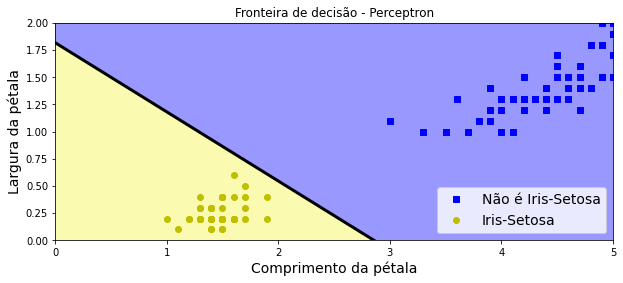

In [3]:
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]
axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(np.linspace(axes[0], axes[1], 500).reshape(-1, 1), np.linspace(axes[2], axes[3], 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], 'bs', label='Não é Iris-Setosa')
plt.plot(X[y==1, 0], X[y==1, 1], 'yo', label='Iris-Setosa')
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], 'k-', linewidth=3)
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.title('Fronteira de decisão - Perceptron')
plt.xlabel('Comprimento da pétala', fontsize=14)
plt.ylabel('Largura da pétala', fontsize=14)
plt.legend(loc='lower right', fontsize=14)
plt.axis(axes)
plt.show()

### Treinando MLP com a API de alto nível do TensorFlow

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0

y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [ ]:
feature_cols = [tf.feature_column.numeric_column('X', shape=[28 * 28])]

dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10, feature_columns=feature_cols)

input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(x={'X': X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)
dnn_clf.train(input_fn=input_fn)

In [6]:
test_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(x={'X': X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-01-07T08:32:45Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpymo3qmiv/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.58764s
INFO:tensorflow:Finished evaluation at 2021-01-07-08:32:46
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.949, average_loss = 0.18026508, global_step = 44000, loss = 0.1790233
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: /tmp/tmpymo3qmiv/model.ckpt-44000


In [7]:
eval_results

{'accuracy': 0.949,
 'average_loss': 0.18026508,
 'loss': 0.1790233,
 'global_step': 44000}

In [8]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
print(y_pred[0])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpymo3qmiv/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
{'logits': array([-3.2897203 , -4.054579  , -0.5177555 ,  0.64667684, -5.86211   ,
       -1.927148  , -7.5822105 ,  7.3848577 , -3.5555332 , -1.2590994 ],
      dtype=float32), 'probabilities': array([2.3082155e-05, 1.0742433e-05, 3.6908404e-04, 1.1825836e-03,
       1.7623889e-06, 9.0164111e-05, 3.1555251e-07, 9.9812871e-01,
       1.7694378e-05, 1.7585861e-04], dtype=float32), 'class_ids': array([7]), 'classes': array([b'7'], dtype=object), 'all_class_ids': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32), 'all_classes': array([b'0', b'1', b'2', b'3', b'4', b'5', b'6', b'7', b'8', b'9'],
      dtype=object)}


### Treinando uma DNN usando TensorFlow regular

#### Fase de construção

In [16]:
tf.compat.v1.disable_eager_execution()

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

tf.compat.v1.reset_default_graph()

X = tf.compat.v1.placeholder(tf.float32, shape=(None, n_inputs), name='X')
y = tf.compat.v1.placeholder(tf.int32, shape=(None), name='y')


with tf.name_scope('dnn'):
    hidden1 = tf.compat.v1.layers.dense(X, n_hidden1, name='hidden1', activation=tf.nn.relu)
    hidden2 = tf.compat.v1.layers.dense(hidden1, n_hidden2, name='hidden2', activation=tf.nn.relu)
    logits = tf.compat.v1.layers.dense(hidden2, n_outputs, name='outputs')
    

with tf.name_scope('loss'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name='loss')
    
    
learning_rate = 0.01

with tf.name_scope('train'):
    optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)
    
with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(y, logits, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.compat.v1.global_variables_initializer()
saver = tf.compat.v1.train.Saver()

#### Fase de execução

In [17]:
n_epochs = 40
batch_size = 50

def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch
        
        
with tf.compat.v1.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, 'Batch accuracy:', acc_batch, 'Val accuracy:', acc_val)

    save_path = saver.save(sess, '/tmp/my_model_final.ckpt')

0 Batch accuracy: 0.88 Val accuracy: 0.9008
1 Batch accuracy: 0.94 Val accuracy: 0.9242
2 Batch accuracy: 0.94 Val accuracy: 0.9338
3 Batch accuracy: 0.98 Val accuracy: 0.9422
4 Batch accuracy: 0.98 Val accuracy: 0.9458
5 Batch accuracy: 0.94 Val accuracy: 0.9504
6 Batch accuracy: 0.96 Val accuracy: 0.9542
7 Batch accuracy: 0.94 Val accuracy: 0.9578
8 Batch accuracy: 0.94 Val accuracy: 0.9592
9 Batch accuracy: 1.0 Val accuracy: 0.9626
10 Batch accuracy: 0.94 Val accuracy: 0.9646
11 Batch accuracy: 1.0 Val accuracy: 0.9676
12 Batch accuracy: 0.94 Val accuracy: 0.9676
13 Batch accuracy: 0.96 Val accuracy: 0.9684
14 Batch accuracy: 1.0 Val accuracy: 0.9698
15 Batch accuracy: 0.94 Val accuracy: 0.9706
16 Batch accuracy: 1.0 Val accuracy: 0.9714
17 Batch accuracy: 1.0 Val accuracy: 0.971
18 Batch accuracy: 1.0 Val accuracy: 0.9738
19 Batch accuracy: 1.0 Val accuracy: 0.9748
20 Batch accuracy: 0.98 Val accuracy: 0.9736
21 Batch accuracy: 0.98 Val accuracy: 0.975
22 Batch accuracy: 1.0 Val ac

In [18]:
with tf.compat.v1.Session() as sess:
    saver.restore(sess, '/tmp/my_model_final.ckpt')
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)
    
print('Predicted classes:', y_pred)
print('Actual classes:', y_test[:20])

INFO:tensorflow:Restoring parameters from /tmp/my_model_final.ckpt
Predicted classes: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
Actual classes: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
